<a href="https://colab.research.google.com/github/bello080/dojo_try/blob/test1/do_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pwd
!ls

/content
sample_data


 １．MNISTデータセットを入手する
 

*  　importエラーを解消する。❗
*   train画像数を確認する❗
*   train画像を確認する❗
*   test画像数を確認する❗
*   test画像を確認する❗
*   精度を高める










In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
# from tensorflow.keras.utils import to_categorical

#下のはあとで使うから置いといてあげて
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#データセットのロード(トレーニング用とテスト用で分かれている)
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

image_rows = 28
image_cols = 28
image_color = 1 #グレースケールのこと
input_shape = (image_rows, image_cols, image_color)
out_size = 10



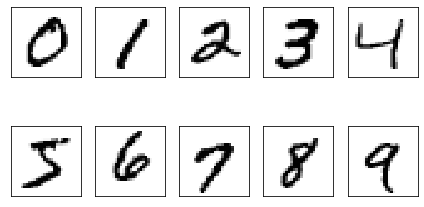

In [ ]:
# MNIST画像を表示する
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(
#     nrows=2,
#     ncols=5,
#     sharex=True,
#     sharey=True, )

# ax = ax.flatten()
# train画像を表示する　START
# for i in range(10):
#     img = X_train[Y_train == i][0].reshape(28, 28)
#     ax[i].imshow(img, cmap='Greys', interpolation='nearest')

# ax[0].set_xticks([])
# ax[0].set_yticks([])
# plt.tight_layout()
# plt.show()
# train画像を表示する　END



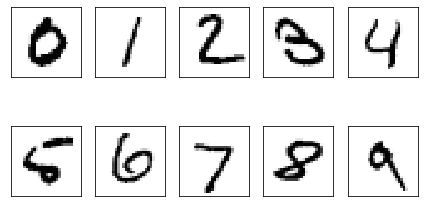

In [ ]:
# fig, ax = plt.subplots(
#     nrows=2,
#     ncols=5,
#     sharex=True,
#     sharey=True, )

# ax = ax.flatten()

# test画像を表示する　START
# for i in range(10):
#     img = X_test[Y_test == i][0].reshape(28, 28)
#     ax[i].imshow(img, cmap='Greys', interpolation='nearest')

# ax[0].set_xticks([])
# ax[0].set_yticks([])
# plt.tight_layout()
# plt.show()
# test画像を表示する　END


In [ ]:
# 画像数を確認する
# train画像数を確認する START
# print('train: ', X_train.shape)
# train画像数を確認する END
# test画像数を確認する START
# print('test: ', X_test.shape)
# test画像数を確認する END


train:  (60000, 28, 28)
(60000, 28, 28)
test:  (10000, 28, 28)


In [ ]:
#データ整形
X_train = X_train.reshape(-1, image_rows, image_cols, image_color) / 255
X_test = X_test.reshape(-1, image_rows, image_cols, image_color) / 255

Y_train = to_categorical(Y_train,out_size)
Y_test = to_categorical(Y_test,out_size)

In [ ]:
#CNNモデル構築
model = Sequential()
#convolutional layer 1
model.add(Conv2D(8, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 精度を高める START
#convolutional layer 2
# model.add(Conv2D(16, (3, 3)))
# model.add(Activation('relu'))
# model.add(Conv2D(16, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# 精度を高める END

model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(
  X_train, Y_train,
  batch_size=128, epochs=1,verbose=1,
  validation_data=(X_test, Y_test)
)

469/469 [==============================] - 36s 75ms/step - loss: 0.8919 - accuracy: 0.6995 - val_loss: 0.1562 - val_accuracy: 0.9558


In [ ]:
#モデルを保存
model.save('MNIST-model.h5')
#重みデータを保存
model.save_weights('MNIST-weights.h5')

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('正解率...', score[1], 'loss=', score[0])

313/313 [==============================] - 3s 8ms/step - loss: 0.1411 - accuracy: 0.9588
正解率... 0.9588000178337097 loss= 0.14109623432159424
